In [27]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import Sequential, Model, layers, initializers, regularizers, optimizers, metrics 

import os
import time
import shutil
import random 
import zipfile

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import ListedColormap

from sklearn.metrics import confusion_matrix

In [28]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [29]:
# Set the machine
gdrive = True
# Set the connection string
path = "/content/gdrive/MyDrive/DL_Project/"
main_folder, training_folder, validation_folder, testing_folder = "datasets/", "train/", "validation/", "test/"
# If using Google Drive
if gdrive:
    # Setup drive
    from google.colab import drive
    drive.mount('/content/gdrive')        
    # Transfer zip dataset to the current virtual machine
    t0 = time.time()
    shutil.copyfile(path + 'datasets.zip', 'datasets.zip')
    # Extract files
    zip_ = zipfile.ZipFile('datasets.zip')
    zip_.extractall()
    zip_.close()
    print("File transfer completed in %0.3f seconds" % (time.time() - t0))
    path = "/content/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
File transfer completed in 3.658 seconds


Custom 128

In [30]:
image_size = (128, 128)
crop_to_aspect_ratio = False
labels='inferred'
color_mode="rgb"
batch_size=16
label_mode="categorical"
shuffle=True
seed=42

In [31]:
ds_test = image_dataset_from_directory(path + main_folder + testing_folder, 
                                                image_size=image_size,
                                                crop_to_aspect_ratio=crop_to_aspect_ratio,
                                                color_mode=color_mode,
                                                batch_size=batch_size,
                                                label_mode=label_mode,
                                                shuffle=shuffle,
                                                seed=seed)

Found 128 files belonging to 3 classes.


In [32]:
from tensorflow.keras.models import load_model
model = load_model("/content/gdrive/MyDrive/DL_Project/saved_models/Custom_128/")

In [33]:
model.summary()

Model: "CNN-2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_augmentation_pipeline (S  (None, None, None, 3)    0         
 equential)                                                      
                                                                 
 batch_normalization_8 (Batc  (None, 128, 128, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 42, 42, 64)        3136      
                                                                 
 batch_normalization_9 (Batc  (None, 42, 42, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 42, 42, 64)        0         
                                                             

In [34]:
 prediction = model.predict(ds_test)

8/8 [==============================] - 1s 79ms/step


In [35]:
prediction

array([[1.34726733e-01, 8.65113139e-01, 1.60094467e-04],
       [1.64001924e-03, 9.97961640e-01, 3.98316450e-04],
       [9.07015324e-01, 7.99806342e-02, 1.30039100e-02],
       [1.17664138e-04, 3.95398762e-04, 9.99486864e-01],
       [7.78113872e-07, 5.96005586e-04, 9.99403119e-01],
       [3.98030170e-05, 9.99948680e-01, 1.14079221e-05],
       [1.60884603e-08, 3.66508243e-06, 9.99996245e-01],
       [8.19163620e-02, 9.17589724e-01, 4.93830303e-04],
       [1.04606347e-02, 9.89208400e-01, 3.31046554e-04],
       [9.94816720e-01, 4.94103553e-03, 2.42282709e-04],
       [1.75161690e-01, 8.23727787e-01, 1.11056666e-03],
       [2.13608425e-03, 9.97189522e-01, 6.74423703e-04],
       [8.69335055e-01, 1.30194753e-01, 4.70228581e-04],
       [7.84428048e-05, 5.32214679e-02, 9.46700096e-01],
       [1.75167770e-05, 9.98459160e-01, 1.52330194e-03],
       [6.27828777e-01, 3.71158630e-01, 1.01247791e-03],
       [1.23677775e-04, 9.99552310e-01, 3.23967339e-04],
       [1.73202436e-02, 9.56538

In [36]:
y_prediction = np.argmax(prediction, axis = 1)
y_prediction

array([1, 1, 0, 2, 2, 1, 2, 1, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 0,
       2, 2, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 1,
       0, 2, 2, 0, 1, 2, 1, 0, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0,
       1, 0, 1, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 0, 0,
       1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0])

In [37]:
true = []
for images, labels_batch in ds_test:
    true += list(labels_batch.numpy())

In [38]:
y_test=np.argmax(true, axis=1)
y_test

array([1, 1, 2, 2, 1, 2, 1, 0, 2, 1, 2, 1, 1, 2, 0, 0, 0, 2, 0, 1, 1, 0,
       2, 2, 1, 1, 1, 0, 1, 0, 2, 0, 2, 1, 0, 1, 2, 2, 1, 1, 0, 0, 0, 1,
       1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 1, 2, 1, 2, 0, 2, 2,
       1, 1, 2, 0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0,
       0, 2, 1, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 2,
       2, 0, 2, 1, 0, 2, 1, 0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2])

<Axes: >

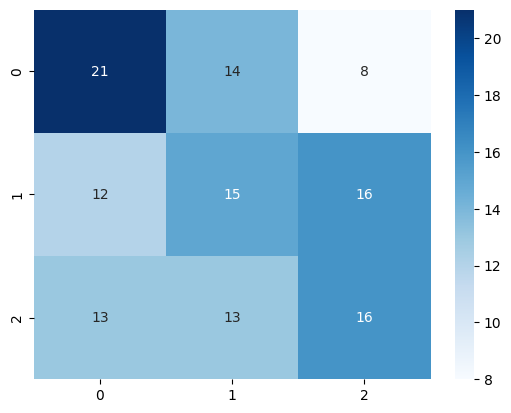

In [39]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_prediction)
sea.heatmap(cf_matrix, annot=True, cmap = 'Blues')

In [40]:
result = confusion_matrix(y_test, y_prediction , normalize='pred')
print(result)

[[0.45652174 0.33333333 0.2       ]
 [0.26086957 0.35714286 0.4       ]
 [0.2826087  0.30952381 0.4       ]]


<Axes: >

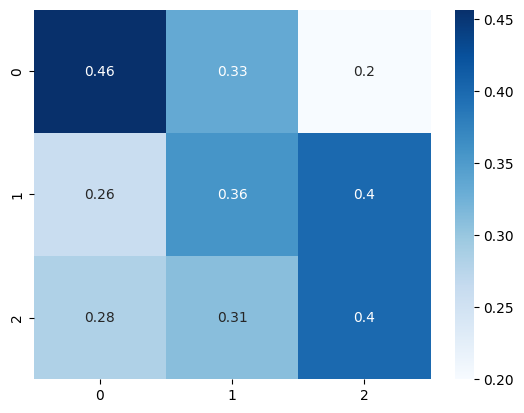

In [41]:
import seaborn as sea
from sklearn.metrics import confusion_matrix
sea.heatmap(result, annot=True, cmap = 'Blues')

## Seems to be more correct


In [43]:
test_pred, true = [], []

for x, y in ds_test:
    y_pred = np.argmax(model(x, training = False), axis = 1)
    test_pred.extend(y_pred)
    true.extend(np.argmax(y, axis = 1))
    
len(test_pred), len(true)

(128, 128)

<Axes: >

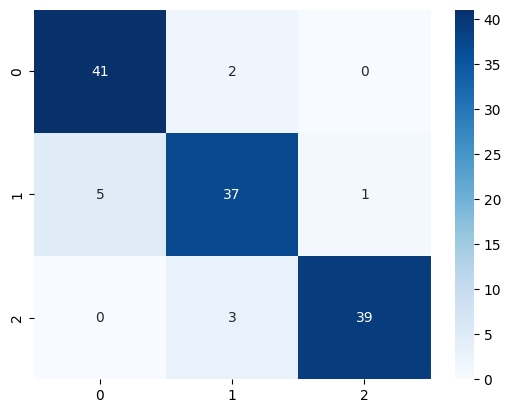

In [44]:
cf_matrix = confusion_matrix(true, test_pred)
sea.heatmap(cf_matrix, annot=True, cmap = 'Blues')

### Checking for other model - "fine_tuning.keras" - based on pretrained VGG16 and fine-tuned

In [47]:
model_directory ="/content/gdrive/MyDrive/DL_Project/saved_models/"
model_name = "fine_tuning.keras"
model = load_model(model_directory+model_name)

# Getting Model predictions
test_pred, true = [], []

for x, y in ds_test:
    y_pred = np.argmax(model(x, training = False), axis = 1)
    test_pred.extend(y_pred)
    true.extend(np.argmax(y, axis = 1))
    
len(test_pred), len(true)

(128, 128)

<Axes: >

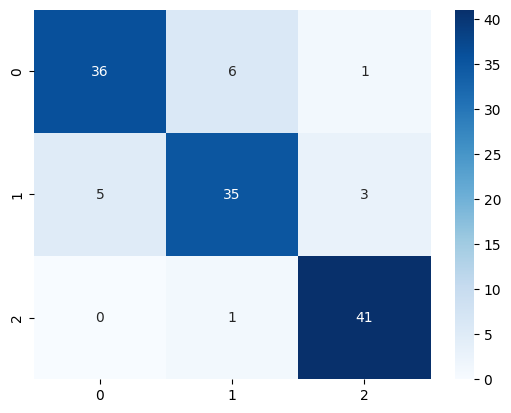

In [48]:
# Creating Confusion Matrix
cf_matrix = confusion_matrix(true, test_pred)
sea.heatmap(cf_matrix, annot=True, cmap = 'Blues')

In [55]:
# To decode the values of labels (to get class names and label indices
class_names = ds_test.class_names 
class_names

['angular_leaf_spot', 'bean_rust', 'healthy']